In [1709]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
from datetime import datetime
from sklearn.preprocessing import LabelEncoder

In [1710]:
# Variables
file_path = "Fuentes de datos\credit+approval\\"
# Convertir los valores categóricos en números
label_encoder = LabelEncoder()

<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\c'
C:\Users\ALEXANDER\AppData\Local\Temp\ipykernel_30708\2395519089.py:2: SyntaxWarning: invalid escape sequence '\c'
  file_path = "Fuentes de datos\credit+approval\\"


In [1711]:
def read_csv_no_header(file_path,file_name):
    # Leer el archivo sin encabezados
    df = pd.read_csv(file_path+file_name, header=None)
    df.replace('?', np.nan, inplace=True)
    return df

In [1712]:
def limpiezadatos(df,column,metodo,valor=0):
    print(f"limpieza de {df[column].isnull().sum()} registros método {metodo}")
    if metodo == 'media':
        df[column] = df[column].fillna(df[column].mean())
    if metodo == 'mediana':
        df[column] = df[column].fillna(df[column].median())
    elif metodo == 'valor':
        df[column] = df[column].fillna(valor)
    elif metodo == 'verdadero_falso':
        df[column] = df[column].replace({'t': 1, 'f': 0})
    elif metodo == 'string':
        # Múltiples espacios
        df[column] = df[column].str.replace(r'\s+', ' ', regex=True)
        # Caracteres especiales
        df[column] = df[column].str.replace(r'[^\w\s]', '', regex=True)
    return df

In [1713]:
dfCreditData = read_csv_no_header(file_path,"crx.data")

In [1714]:
display(dfCreditData)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [1715]:
print(dfCreditData[1].isna().sum())


12


In [1716]:
display(dfCreditData.dtypes)

0      object
1      object
2     float64
3      object
4      object
5      object
6      object
7     float64
8      object
9      object
10      int64
11     object
12     object
13     object
14      int64
15     object
dtype: object

In [1717]:


#column 0 vlues a, b, 0
dfCreditData = limpiezadatos(dfCreditData,0,'valor','N/D')
#column 1, presumible edad por los valores de rango entre 15 y 85
dfCreditData[1] = pd.to_numeric(dfCreditData[1], errors='coerce')
dfCreditData = limpiezadatos(dfCreditData,1,'media')


#verdadero_falso
dfCreditData = limpiezadatos(dfCreditData,8,'verdadero_falso')
dfCreditData = limpiezadatos(dfCreditData,9,'verdadero_falso')
dfCreditData = limpiezadatos(dfCreditData,11,'verdadero_falso')
dfCreditData = limpiezadatos(dfCreditData,3,'valor','u')

dfCreditData[15] = dfCreditData[15].replace({'+': 1, '-': 0})



dfCreditData['4_cod'] = label_encoder.fit_transform(dfCreditData[3])
dfCreditData['5_cod'] = label_encoder.fit_transform(dfCreditData[4])
dfCreditData['6_cod'] = label_encoder.fit_transform(dfCreditData[5])
dfCreditData['7_cod'] = label_encoder.fit_transform(dfCreditData[6])

# Eliminar filas con NaN en cualquiera de las dos columnas de interés
#df_clean = dfCreditData.dropna(subset=['columna_6_codificada', 15])

#Cargo dataframes auxiliares con data obtenida del archivo lisp
#dfPosNegCases = read_csv_no_header(file_path,"pos_neg_cases")
#dfItemPurchased = read_csv_no_header(file_path,"item_purchased")
#dfGender = read_csv_no_header(file_path,"Gender")
#dfUnmarried = read_csv_no_header(file_path,"unmarried")
#dfProblematicRegion = read_csv_no_header(file_path,"problematic_region")
#dfAge = read_csv_no_header(file_path,"Age")
#dfMoneyonDeposit = read_csv_no_header(file_path,"money_on_deposit")
#dfMonthlyLoanPayment = read_csv_no_header(file_path,"monthly_loan_payment")
#dfYearsInCompany = read_csv_no_header(file_path,"years_in_company")


# Mostrar los tipos de datos
print("Tipos de datos:")
print(dfCreditData.dtypes)

# Mostrar los primeros valores
print("\nPrimeros valores:")
print(dfCreditData.head())


limpieza de 12 registros método valor
limpieza de 12 registros método media
limpieza de 0 registros método verdadero_falso
limpieza de 0 registros método verdadero_falso
limpieza de 0 registros método verdadero_falso
limpieza de 6 registros método valor
Tipos de datos:
0         object
1        float64
2        float64
3         object
4         object
5         object
6         object
7        float64
8          int64
9          int64
10         int64
11         int64
12        object
13        object
14         int64
15         int64
4_cod      int64
5_cod      int64
6_cod      int64
7_cod      int64
dtype: object

Primeros valores:
   0      1      2  3  4  5  6     7  8  9  10  11 12     13   14  15  4_cod  \
0  b  30.83  0.000  u  g  w  v  1.25  1  1   1   0  g  00202    0   1      1   
1  a  58.67  4.460  u  g  q  h  3.04  1  1   6   0  g  00043  560   1      1   
2  a  24.50  0.500  u  g  q  h  1.50  1  0   0   0  g  00280  824   1      1   
3  b  27.83  1.540  u  g  w  v  3.75 

C:\Users\ALEXANDER\AppData\Local\Temp\ipykernel_30708\35136587.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].replace({'t': 1, 'f': 0})
C:\Users\ALEXANDER\AppData\Local\Temp\ipykernel_30708\598371925.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfCreditData[15] = dfCreditData[15].replace({'+': 1, '-': 0})


In [1718]:
display(dfPosNegCases)

,0,1
0,pos,1
1,pos,2
2,pos,4
3,pos,5
4,pos,6
...,...,...
120,neg,113
121,neg,114
122,neg,115
123,neg,120


In [1719]:
counts = dfCreditData[15].value_counts()

# Calcular el porcentaje
total = counts.sum()
percentages = (counts / total) * 100

# Mostrar resultados
result = pd.DataFrame({'Count': counts, 'Percentage': percentages})
print(result)

    Count  Percentage
15                   
0     383   55.507246
1     307   44.492754


In [1720]:
display(dfItemPurchased[1].unique())

array(['pc', 'car', 'stereo', 'jewel', 'medinstru', 'bike', 'furniture'],
      dtype=object)

In [1721]:
print(dfCreditData.dtypes)

0         object
1        float64
2        float64
3         object
4         object
5         object
6         object
7        float64
8          int64
9          int64
10         int64
11         int64
12        object
13        object
14         int64
15         int64
4_cod      int64
5_cod      int64
6_cod      int64
7_cod      int64
dtype: object


In [1722]:
display(dfCreditData)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,4_cod,5_cod,6_cod,7_cod
0,b,30.83,0.000,u,g,w,v,1.25,1,1,1,0,g,00202,0,1,1,0,12,7
1,a,58.67,4.460,u,g,q,h,3.04,1,1,6,0,g,00043,560,1,1,0,10,3
2,a,24.50,0.500,u,g,q,h,1.50,1,0,0,0,g,00280,824,1,1,0,10,3
3,b,27.83,1.540,u,g,w,v,3.75,1,1,5,1,g,00100,3,1,1,0,12,7
4,b,20.17,5.625,u,g,w,v,1.71,1,0,0,0,s,00120,0,1,1,0,12,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,0,0,0,0,g,00260,0,0,2,2,4,3
686,a,22.67,0.750,u,g,c,v,2.00,0,1,2,1,g,00200,394,0,1,0,1,7
687,a,25.25,13.500,y,p,ff,ff,2.00,0,1,1,1,g,00200,1,0,2,2,5,2
688,b,17.92,0.205,u,g,aa,v,0.04,0,0,0,0,g,00280,750,0,1,0,0,7


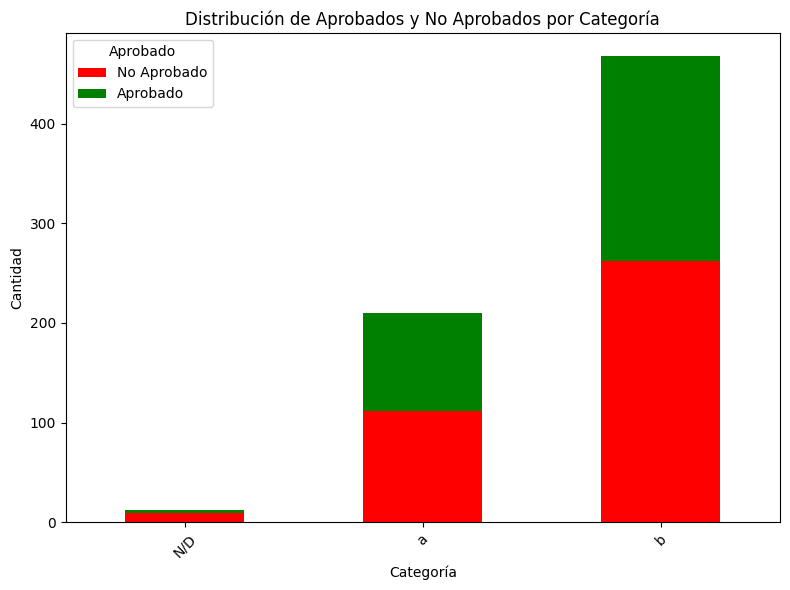

In [1723]:
# Contar la cantidad de aprobados y no aprobados por cada rango de edad
resultado = dfCreditData.groupby([0, 15]).size().unstack(fill_value=0)
# Graficar los resultados
resultado.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(8, 6))
plt.title('Distribución de Aprobados y No Aprobados por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.legend(title='Aprobado', labels=['No Aprobado', 'Aprobado'])
plt.tight_layout()
plt.show()

In [1724]:
dfCreditData["numero_linea"] = dfCreditData.index + 1
# Ver columnas con valores nulos
fila_especifica = dfCreditData[dfCreditData['numero_linea']==609]
display(fila_especifica)


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,4_cod,5_cod,6_cod,7_cod,numero_linea
608,b,31.568171,0.04,y,p,d,v,4.25,0,0,...,1,g,00460,0,0,2,2,3,7,609


In [1725]:
print(dfCreditData.dtypes)

0                object
1               float64
2               float64
3                object
4                object
5                object
6                object
7               float64
8                 int64
9                 int64
10                int64
11                int64
12               object
13               object
14                int64
15                int64
4_cod             int64
5_cod             int64
6_cod             int64
7_cod             int64
numero_linea      int64
dtype: object


In [1726]:
print(dfCreditData[1].describe())


count    690.000000
mean      31.568171
std       11.853273
min       13.750000
25%       22.670000
50%       28.625000
75%       37.707500
max       80.250000
Name: 1, dtype: float64


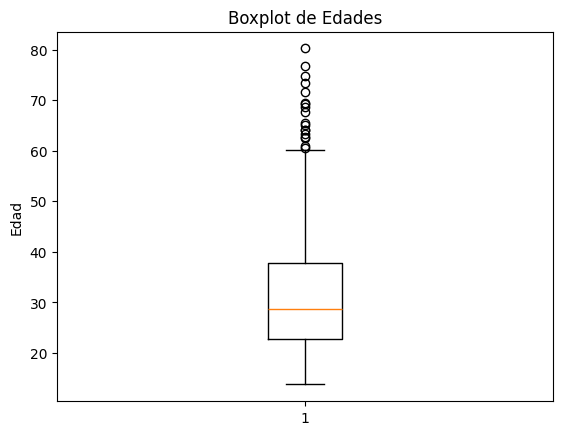

In [1727]:
#edades
plt.boxplot(dfCreditData[1])
plt.title('Boxplot de Edades')
plt.ylabel('Edad')
plt.show()

In [1728]:
# Definir los límites de los rangos de edad
bins = [1,11,18, 25, 35, 45, 55, 63, 71, 79, float('inf')]  # Aquí definimos los rangos
labels = ['1-10','11-17','18-25', '26-35', '36-45', '46-55', '56-63', '64-71', '72-79', '80+']  # Etiquetas para cada rango

# Crear una nueva columna que clasifica las edades en los rangos
dfCreditData['Rango_Edad'] = pd.cut(dfCreditData[1], bins=bins, labels=labels, right=True)

print(dfCreditData['Rango_Edad'].isnull().sum())


print(dfCreditData)

0
     0      1       2  3  4   5   6     7  8  9  ...  12     13   14 15  \
0    b  30.83   0.000  u  g   w   v  1.25  1  1  ...   g  00202    0  1   
1    a  58.67   4.460  u  g   q   h  3.04  1  1  ...   g  00043  560  1   
2    a  24.50   0.500  u  g   q   h  1.50  1  0  ...   g  00280  824  1   
3    b  27.83   1.540  u  g   w   v  3.75  1  1  ...   g  00100    3  1   
4    b  20.17   5.625  u  g   w   v  1.71  1  0  ...   s  00120    0  1   
..  ..    ...     ... .. ..  ..  ..   ... .. ..  ...  ..    ...  ... ..   
685  b  21.08  10.085  y  p   e   h  1.25  0  0  ...   g  00260    0  0   
686  a  22.67   0.750  u  g   c   v  2.00  0  1  ...   g  00200  394  0   
687  a  25.25  13.500  y  p  ff  ff  2.00  0  1  ...   g  00200    1  0   
688  b  17.92   0.205  u  g  aa   v  0.04  0  0  ...   g  00280  750  0   
689  b  35.00   3.375  u  g   c   h  8.29  0  0  ...   g  00000    0  0   

     4_cod  5_cod  6_cod  7_cod  numero_linea  Rango_Edad  
0        1      0     12      7      

In [1729]:
display(dfCreditData)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,4_cod,5_cod,6_cod,7_cod,numero_linea,Rango_Edad
0,b,30.83,0.000,u,g,w,v,1.25,1,1,...,g,00202,0,1,1,0,12,7,1,26-35
1,a,58.67,4.460,u,g,q,h,3.04,1,1,...,g,00043,560,1,1,0,10,3,2,56-63
2,a,24.50,0.500,u,g,q,h,1.50,1,0,...,g,00280,824,1,1,0,10,3,3,18-25
3,b,27.83,1.540,u,g,w,v,3.75,1,1,...,g,00100,3,1,1,0,12,7,4,26-35
4,b,20.17,5.625,u,g,w,v,1.71,1,0,...,s,00120,0,1,1,0,12,7,5,18-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,0,0,...,g,00260,0,0,2,2,4,3,686,18-25
686,a,22.67,0.750,u,g,c,v,2.00,0,1,...,g,00200,394,0,1,0,1,7,687,18-25
687,a,25.25,13.500,y,p,ff,ff,2.00,0,1,...,g,00200,1,0,2,2,5,2,688,26-35
688,b,17.92,0.205,u,g,aa,v,0.04,0,0,...,g,00280,750,0,1,0,0,7,689,11-17


C:\Users\ALEXANDER\AppData\Local\Temp\ipykernel_30708\44511770.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resultado = dfCreditData.groupby(['Rango_Edad', 15]).size().unstack(fill_value=0)


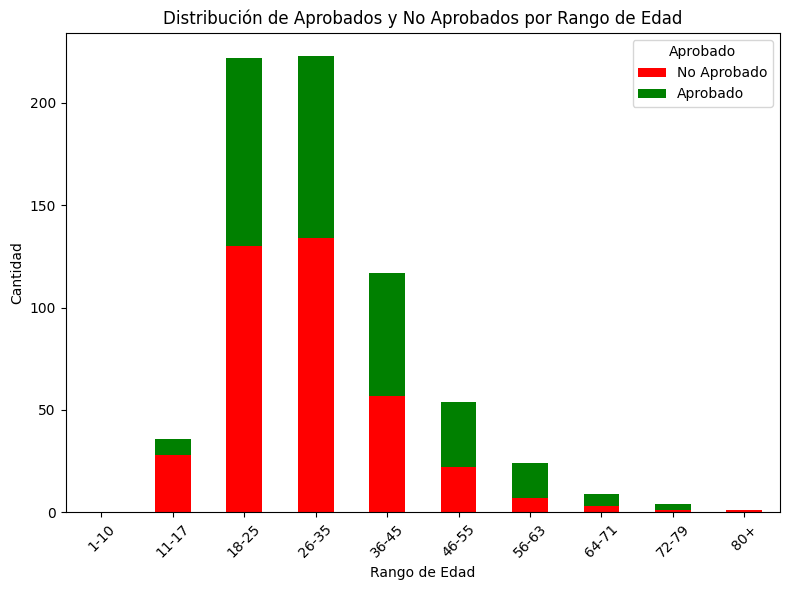

In [1730]:
# Contar la cantidad de aprobados y no aprobados por cada rango de edad
resultado = dfCreditData.groupby(['Rango_Edad', 15]).size().unstack(fill_value=0)
# Graficar los resultados
resultado.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(8, 6))
plt.title('Distribución de Aprobados y No Aprobados por Rango de Edad')
plt.xlabel('Rango de Edad')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.legend(title='Aprobado', labels=['No Aprobado', 'Aprobado'])
plt.tight_layout()
plt.show()

In [1731]:
display(resultado)

15,0,1
Rango_Edad,,
1-10,0,0
11-17,28,8
18-25,130,92
26-35,134,89
36-45,57,60
46-55,22,32
56-63,7,17
64-71,3,6
72-79,1,3


In [1732]:
import pandas as pd

# Filtrar los datos en base a la columna 15
df_aprobados = dfCreditData[dfCreditData[15] == 1]
df_no_aprobados = dfCreditData[dfCreditData[15] == 0]

# Seleccionar las columnas de interés (4, 5, 6, 7)
columnas_interes = [4, 5, 6, 7]

# Crear un DataFrame solo con las columnas seleccionadas para los aprobados
df_aprobados_interes = df_aprobados[columnas_interes].astype(str)

# Calcular las ocurrencias de los valores más comunes en cada columna
conteo_columnas = df_aprobados_interes.apply(pd.Series.value_counts)

# Calcular el porcentaje de ocurrencias
porcentaje_columnas = conteo_columnas.div(conteo_columnas.sum(axis=0), axis=1) * 100

# Mostrar los porcentajes
print(porcentaje_columnas)

top_10_column_4 = conteo_columnas[4].sort_values(ascending=False).head(10)

# Mostrar los 10 casos más grandes
print(top_10_column_4)

        4          5          6         7
0.0   NaN        NaN        NaN  5.863192
0.04  NaN        NaN        NaN  4.234528
0.085 NaN        NaN        NaN  1.628664
0.125 NaN        NaN        NaN  1.628664
0.165 NaN        NaN        NaN  0.651466
...    ..        ...        ...       ...
r     NaN   0.651466        NaN       NaN
v     NaN        NaN  55.048860       NaN
w     NaN  10.749186        NaN       NaN
x     NaN  10.423453        NaN       NaN
z     NaN        NaN   1.954397       NaN

[143 rows x 4 columns]
g        256.0
p         45.0
nan        4.0
gg         2.0
0.0        NaN
0.04       NaN
0.085      NaN
0.125      NaN
0.165      NaN
0.21       NaN
Name: 4, dtype: float64


In [1733]:
display(dfCreditData)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,4_cod,5_cod,6_cod,7_cod,numero_linea,Rango_Edad
0,b,30.83,0.000,u,g,w,v,1.25,1,1,...,g,00202,0,1,1,0,12,7,1,26-35
1,a,58.67,4.460,u,g,q,h,3.04,1,1,...,g,00043,560,1,1,0,10,3,2,56-63
2,a,24.50,0.500,u,g,q,h,1.50,1,0,...,g,00280,824,1,1,0,10,3,3,18-25
3,b,27.83,1.540,u,g,w,v,3.75,1,1,...,g,00100,3,1,1,0,12,7,4,26-35
4,b,20.17,5.625,u,g,w,v,1.71,1,0,...,s,00120,0,1,1,0,12,7,5,18-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,0,0,...,g,00260,0,0,2,2,4,3,686,18-25
686,a,22.67,0.750,u,g,c,v,2.00,0,1,...,g,00200,394,0,1,0,1,7,687,18-25
687,a,25.25,13.500,y,p,ff,ff,2.00,0,1,...,g,00200,1,0,2,2,5,2,688,26-35
688,b,17.92,0.205,u,g,aa,v,0.04,0,0,...,g,00280,750,0,1,0,0,7,689,11-17


In [1734]:
display(dfCreditData)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,4_cod,5_cod,6_cod,7_cod,numero_linea,Rango_Edad
0,b,30.83,0.000,u,g,w,v,1.25,1,1,...,g,00202,0,1,1,0,12,7,1,26-35
1,a,58.67,4.460,u,g,q,h,3.04,1,1,...,g,00043,560,1,1,0,10,3,2,56-63
2,a,24.50,0.500,u,g,q,h,1.50,1,0,...,g,00280,824,1,1,0,10,3,3,18-25
3,b,27.83,1.540,u,g,w,v,3.75,1,1,...,g,00100,3,1,1,0,12,7,4,26-35
4,b,20.17,5.625,u,g,w,v,1.71,1,0,...,s,00120,0,1,1,0,12,7,5,18-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,0,0,...,g,00260,0,0,2,2,4,3,686,18-25
686,a,22.67,0.750,u,g,c,v,2.00,0,1,...,g,00200,394,0,1,0,1,7,687,18-25
687,a,25.25,13.500,y,p,ff,ff,2.00,0,1,...,g,00200,1,0,2,2,5,2,688,26-35
688,b,17.92,0.205,u,g,aa,v,0.04,0,0,...,g,00280,750,0,1,0,0,7,689,11-17


In [1735]:
# Calcular la correlación entre las columnas 8, 9 y 15
correlacion = dfCreditData[['4_cod','5_cod','6_cod','7_cod',8, 9,11, 15]].corr()

# Mostrar la matriz de correlación
print(correlacion)

          4_cod     5_cod     6_cod     7_cod         8         9        11  \
4_cod  1.000000  0.932111 -0.050210 -0.025327 -0.129863 -0.162464 -0.004964   
5_cod  0.932111  1.000000  0.000996  0.016134 -0.168216 -0.192809 -0.021344   
6_cod -0.050210  0.000996  1.000000  0.047812  0.075782  0.092870  0.045922   
7_cod -0.025327  0.016134  0.047812  1.000000 -0.044568 -0.011271 -0.015337   
8     -0.129863 -0.168216  0.075782 -0.044568  1.000000  0.432032  0.091276   
9     -0.162464 -0.192809  0.092870 -0.011271  0.432032  1.000000  0.017043   
11    -0.004964 -0.021344  0.045922 -0.015337  0.091276  0.017043  1.000000   
15    -0.194306 -0.165491  0.128374  0.000846  0.720407  0.458301  0.031625   

             15  
4_cod -0.194306  
5_cod -0.165491  
6_cod  0.128374  
7_cod  0.000846  
8      0.720407  
9      0.458301  
11     0.031625  
15     1.000000  


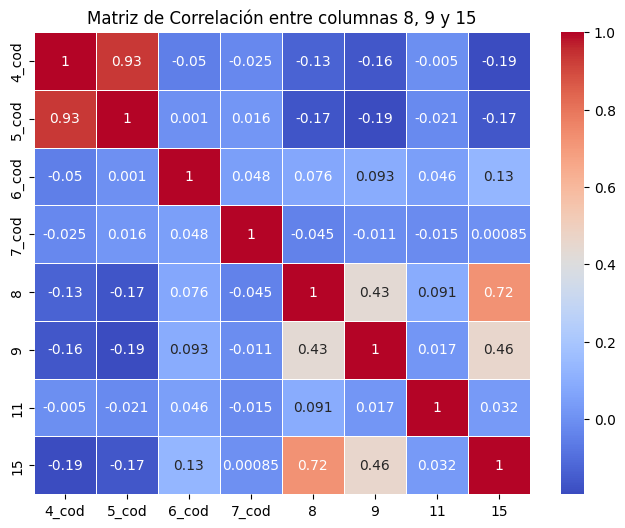

In [1736]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un mapa de calor para la correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación entre columnas 8, 9 y 15')
plt.show()

In [1737]:
conteo_columna_15 = df_no_aprobados[15].value_counts()

display(conteo_columna_15)

15
0    383
Name: count, dtype: int64

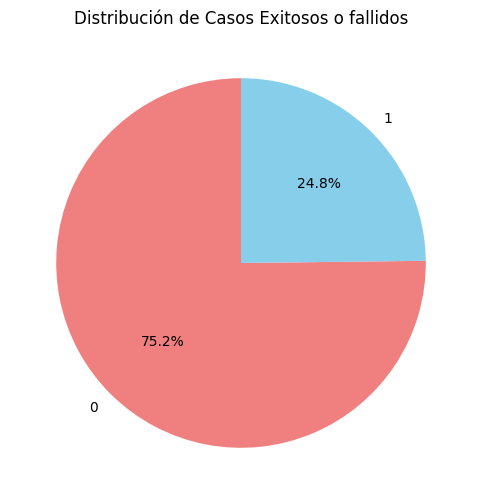

In [1738]:
df_mujeres = dfCreditData[dfCreditData[10] == 0]

df_casos_exito = df_mujeres[df_mujeres[15].isin([0, 1])]

# Contar los valores únicos de la columna 15 (0 y 1)
conteo_columna_15 = df_casos_exito[15].value_counts()

# Crear la gráfica de torta (pie chart)
plt.figure(figsize=(8, 6))
conteo_columna_15.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'skyblue'], startangle=90, legend=False)

# Añadir título
plt.title('Distribución de Casos Exitosos o fallidos')

# Mostrar la gráfica
plt.ylabel('')  # Para eliminar la etiqueta del eje y
plt.show()

Coeficientes de la regresión: [0.84640176 0.15617375]
Intersección de la regresión: 0.006425627885706553


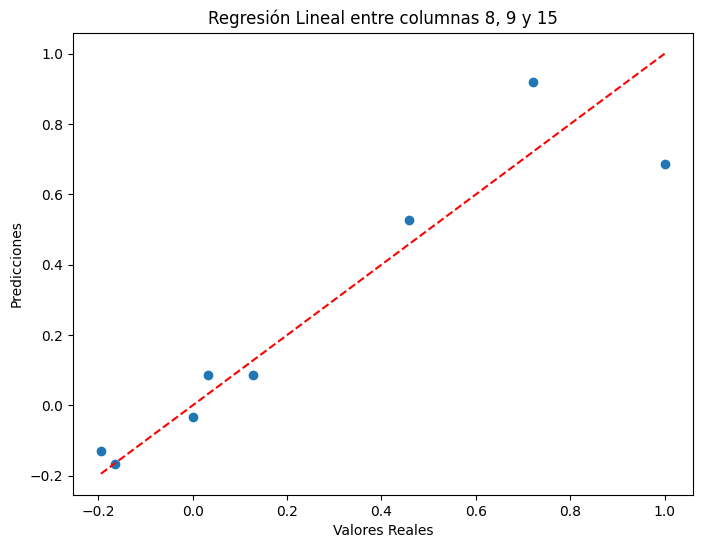

In [1739]:
from sklearn.linear_model import LinearRegression

# Preparar los datos
X = correlacion[[8,9]]  # Las columnas predictoras
y = correlacion[15]  # La columna dependiente

# Ajustar el modelo
modelo = LinearRegression()
modelo.fit(X, y)

# Ver los coeficientes
print(f"Coeficientes de la regresión: {modelo.coef_}")
print(f"Intersección de la regresión: {modelo.intercept_}")

# Predicciones
predicciones = modelo.predict(X)

# Graficar las predicciones vs los valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y, predicciones)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Regresión Lineal entre columnas 8, 9 y 15')
plt.show()


In [1740]:
counts = dfCreditData[0].value_counts(dropna=False)
display(counts)

0
b      468
a      210
N/D     12
Name: count, dtype: int64

In [1741]:
display(dfCreditData)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,4_cod,5_cod,6_cod,7_cod,numero_linea,Rango_Edad
0,b,30.83,0.000,u,g,w,v,1.25,1,1,...,g,00202,0,1,1,0,12,7,1,26-35
1,a,58.67,4.460,u,g,q,h,3.04,1,1,...,g,00043,560,1,1,0,10,3,2,56-63
2,a,24.50,0.500,u,g,q,h,1.50,1,0,...,g,00280,824,1,1,0,10,3,3,18-25
3,b,27.83,1.540,u,g,w,v,3.75,1,1,...,g,00100,3,1,1,0,12,7,4,26-35
4,b,20.17,5.625,u,g,w,v,1.71,1,0,...,s,00120,0,1,1,0,12,7,5,18-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,0,0,...,g,00260,0,0,2,2,4,3,686,18-25
686,a,22.67,0.750,u,g,c,v,2.00,0,1,...,g,00200,394,0,1,0,1,7,687,18-25
687,a,25.25,13.500,y,p,ff,ff,2.00,0,1,...,g,00200,1,0,2,2,5,2,688,26-35
688,b,17.92,0.205,u,g,aa,v,0.04,0,0,...,g,00280,750,0,1,0,0,7,689,11-17
